### Attention

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
embedding_dim = 10
n_words = 5
embedding_vector = torch.rand(size = (n_words, embedding_dim)) #n_words word vectors, each embedding_dim sized

In [3]:
Q = torch.rand(size = (embedding_dim, embedding_dim))
K = torch.rand(size = (embedding_dim, embedding_dim))
V = torch.rand(size = (embedding_dim, embedding_dim))

In [4]:
query = torch.matmul(embedding_vector,Q)
key = torch.matmul(embedding_vector,K)
values = torch.matmul(embedding_vector,V)

In [5]:
query.shape, key.shape, values.shape

(torch.Size([5, 10]), torch.Size([5, 10]), torch.Size([5, 10]))

In [6]:
%%time
scores = torch.matmul(query, key.T)
scores = scores / (embedding_dim ** 0.5)
scores.shape

scores = torch.softmax(scores, axis = 1)

CPU times: user 3.08 ms, sys: 415 µs, total: 3.49 ms
Wall time: 2.21 ms


In [7]:
%%time
scores = torch.matmul(query, key.T)
scaling_factor = torch.sqrt(torch.tensor(embedding_dim, dtype=torch.float32))
scores = scores / scaling_factor
scores.shape

scores = torch.softmax(scores, axis = 1)

CPU times: user 1.39 ms, sys: 0 ns, total: 1.39 ms
Wall time: 839 µs


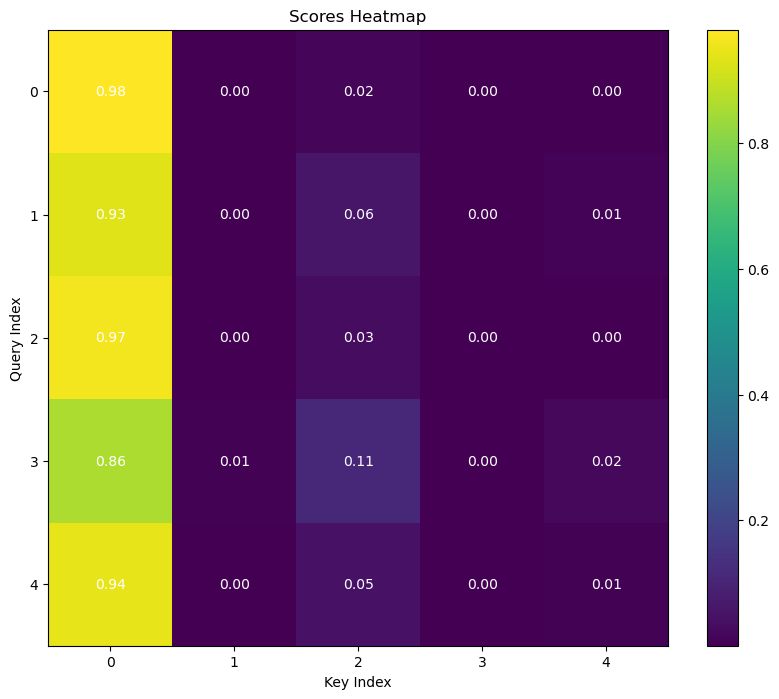

In [8]:
# Convert the scores tensor to a NumPy array for plotting
scores_np = scores.numpy()

# Create the heatmap using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(scores_np, cmap='viridis', aspect='auto')
#plt.imshow(scores_np, cmap='hot', aspect='auto')
plt.colorbar()

# Adding annotations
for i in range(scores_np.shape[0]):
    for j in range(scores_np.shape[1]):
        plt.text(j, i, f"{scores_np[i, j]:.2f}", ha='center', va='center', color='w')

plt.title('Scores Heatmap')
plt.xlabel('Key Index')
plt.ylabel('Query Index')
plt.show()

In [9]:
scores

tensor([[9.8088e-01, 9.2688e-05, 1.8086e-02, 5.0749e-06, 9.3122e-04],
        [9.3139e-01, 1.6305e-03, 5.8768e-02, 2.3699e-04, 7.9729e-03],
        [9.6548e-01, 4.0047e-04, 3.1467e-02, 3.4176e-05, 2.6198e-03],
        [8.6040e-01, 6.2244e-03, 1.0900e-01, 1.4718e-03, 2.2909e-02],
        [9.4483e-01, 8.5217e-04, 4.9124e-02, 1.0704e-04, 5.0881e-03]])

In [10]:
attention_output = torch.matmul(scores, values)

In [11]:
attention_output.shape

torch.Size([5, 10])

In [12]:
attention_output

tensor([[2.9484, 3.5850, 2.8412, 3.1723, 2.1682, 3.0015, 2.4034, 2.3969, 3.2415,
         2.6893],
        [2.9379, 3.5570, 2.8021, 3.1373, 2.1297, 2.9750, 2.3876, 2.3782, 3.2138,
         2.6545],
        [2.9457, 3.5768, 2.8294, 3.1619, 2.1558, 2.9936, 2.3988, 2.3913, 3.2334,
         2.6784],
        [2.9156, 3.5105, 2.7413, 3.0815, 2.0790, 2.9325, 2.3615, 2.3484, 3.1681,
         2.6059],
        [2.9419, 3.5656, 2.8134, 3.1477, 2.1394, 2.9829, 2.3925, 2.3838, 3.2223,
         2.6637]])

In [13]:
values.shape

torch.Size([5, 10])

#### Multi-headed attention

In [14]:
import numpy as np

In [15]:
num_heads = 2

# split each of Q, K, V into 'num_heads' chunks
# in reality, Q, K, V are projected 'num_heads' times,
# with each having a dimensionality of d_K / num_heads
Q_heads = np.array_split(Q.numpy(), num_heads)
K_heads = np.array_split(K, num_heads)
V_heads = np.array_split(V, num_heads)

In [ ]:
def softmax(x: np.ndarray, axis: int) -> np.ndarray:
    x = np.exp(x - np.amax(x, axis=axis, keepdims=True))
    return x / np.sum(x, axis=axis, keepdims=True)

In [18]:
def attention(q: np.ndarray, k: np.ndarray, v: np.ndarray) -> np.ndarray:
    scores = np.dot(q, k.T)
    scores = softmax(scores / k.shape[1]**0.5, axis=1)
    return np.dot(scores, v)

In [19]:
mha = []  # multi_headed_attention
for q, k, v in zip(Q_heads, K_heads, V_heads):
    mha.append(attention(q, k, v))

mha = np.concatenate(mha)

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, axis=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype, *, Tensor out)
 * (Tensor input, name dim, *, torch.dtype dtype)


#### The Annotated Transformer